<a href="https://colab.research.google.com/github/AkashK18/-NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/Netflix_%26_TV_Shows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

 **In this project, you are required to do**

1. Exploratory Data Analysis

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.

4. Clustering similar content by matching text-based features

**Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

GitHub Links:- https://github.com/AkashK18/-NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING

# **Importing Libraries**

In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np

# importing libraries for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

**Mounting drive and Loading Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/almabetter/Capstone project 2 Netflix&TV/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

**Looking and understanding about all the aspects of dataset.**

In [6]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [7]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [8]:
#shape and size of dataset
df.shape

(7787, 12)

In [9]:
#looking for any duplicates in dataset
len(df[df.duplicated()])

0

**Looking for null values in dataset**

In [10]:
#sum of all null values for each features
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64



*   Several features in dataset have null values.
*   So to handle those null values in better way, lets look for percentage of null values in dataset.



In [11]:
#percentage of all null values for each features
df.isnull().sum()/df.shape[0]*100

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

In [12]:
df.drop('director', axis=1, inplace=True)
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)
df.dropna(subset=['date_added'], inplace=True)
df['cast'].fillna('missing', inplace=True)

In [13]:
#final check for null value
df.isnull().sum()/df.shape[0]*100

show_id         0.0
type            0.0
title           0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

All the null values handed and dataset is ready for next challenges.


**Looking for data types and data formats**

In [14]:
# information about all the features of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7777 non-null   object
 1   type          7777 non-null   object
 2   title         7777 non-null   object
 3   cast          7777 non-null   object
 4   country       7777 non-null   object
 5   date_added    7777 non-null   object
 6   release_year  7777 non-null   int64 
 7   rating        7777 non-null   object
 8   duration      7777 non-null   object
 9   listed_in     7777 non-null   object
 10  description   7777 non-null   object
dtypes: int64(1), object(10)
memory usage: 729.1+ KB


Date_added feature have object datatype.

converting to datetime datatype from object datatype.

In [15]:
df['date_added'] = pd.to_datetime(df['date_added'])

Duration feature have object datatype . Converting to int datetype from object datatype

In [16]:
df['duration']

0       4 Seasons
1          93 min
2          78 min
3          80 min
4         123 min
          ...    
7782       99 min
7783      111 min
7784       44 min
7785     1 Season
7786       90 min
Name: duration, Length: 7777, dtype: object



*   Duration are in combination of int values and string.
*   Removing string part so as to get int datatype.



In [17]:
#splitting each values by space and selecting int part at zeroth index
df['duration'] = df['duration'].apply(lambda x : x.split(" ")[0])


In [18]:
# check for updated duration values
df['duration']

0         4
1        93
2        78
3        80
4       123
       ... 
7782     99
7783    111
7784     44
7785      1
7786     90
Name: duration, Length: 7777, dtype: object

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7777 non-null   object        
 1   type          7777 non-null   object        
 2   title         7777 non-null   object        
 3   cast          7777 non-null   object        
 4   country       7777 non-null   object        
 5   date_added    7777 non-null   datetime64[ns]
 6   release_year  7777 non-null   int64         
 7   rating        7777 non-null   object        
 8   duration      7777 non-null   object        
 9   listed_in     7777 non-null   object        
 10  description   7777 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 729.1+ KB


Now all the features and their values are in required datatyped and formats.

In [20]:
# setting limits for display of rows and columns for better understanding.
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

**Creating some new features from existing features to understand data better.**

In [21]:
# add new features from date feature.
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['day_added'] = df['date_added'].dt.day

In [22]:
#check for final dataset shape
df.shape

(7777, 14)

# **EDA**

**Movies Vs. TV Shows**



*   This dataset contains data about movies and TV shows which were added on netflix.




**Lets look at dominance between Movies and TV Shows.**

([<matplotlib.patches.Wedge at 0x7f7deb8f04f0>,
 [Text(-0.9070648963562528, -0.6222807033792873, 'Movie'),
  Text(0.9895252779208632, 0.6788517690598137, 'Tv show')],
 [Text(-0.4947626707397742, -0.339425838206884, '69.14%'),
  Text(0.5772230787871702, 0.39599686528489125, '30.86%')])

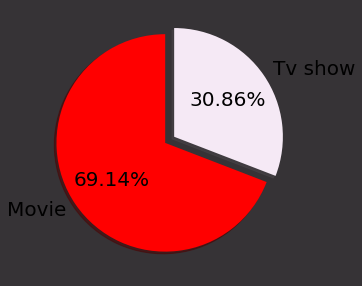

In [23]:
# pie chart showing percentage of total movies and TV shows.
# Choose this facecolor so as to give styke of netflix
fig, ax = plt.subplots(figsize=(5,5), facecolor="#363336")
ax.patch.set_facecolor('#363336')
explode = (0, 0.1)
ax.pie(df['type'].value_counts(), explode=explode, autopct='%.2f%%', labels = ['Movie', 'Tv show'], shadow = True,
       startangle=90, textprops={'color':"black", 'fontsize':20}, colors=['red', '#F5E9F5'])




*   Movies uploaded on Netflix are more than twice the TV sj=hows uploaded.

*   This does not implies that movies are more indulging that of TV shows.

*   Beacause TV shows may have several seasons which consists of number of episodes.


*   Duration of TV shows are much more that movies.



Number of Movies and TV Shows added on netflix.

On Year Basis 





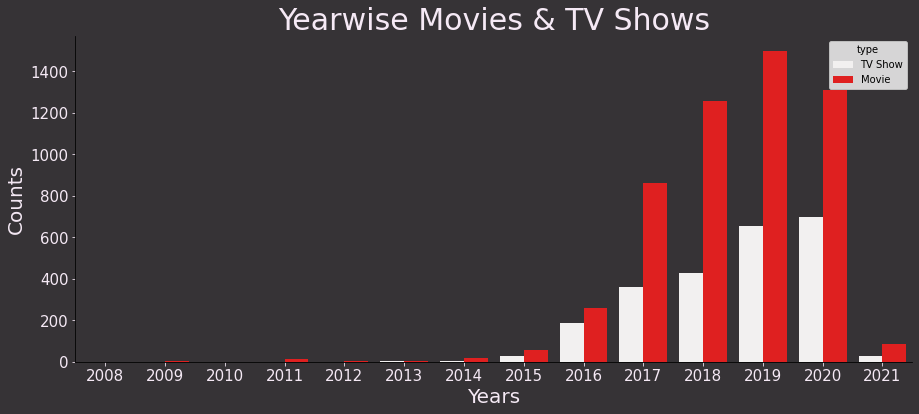

In [24]:
fig, ax = plt.subplots(figsize=(15,6), facecolor="#363336")
ax.patch.set_facecolor('#363336')
sns.countplot(x='year_added', hue='type', lw=5, color='red', data=df, ax=ax)
ax.tick_params(axis='x', colors='#F5E9F5', labelsize=15)
ax.tick_params(axis='y', colors='#F5E9F5', labelsize=15)
ax.set_xlabel("Years", color='#F5E9F5', fontsize=20)
ax.set_ylabel("Counts", color='#F5E9F5', fontsize=20)
ax.set_title("Yearwise Movies & TV Shows", color='#F5E9F5', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)



*   TV shows are increasing continuosly.
*   Movies were increasing continuosly but after 2019 there is fall.



**On Month Basis**

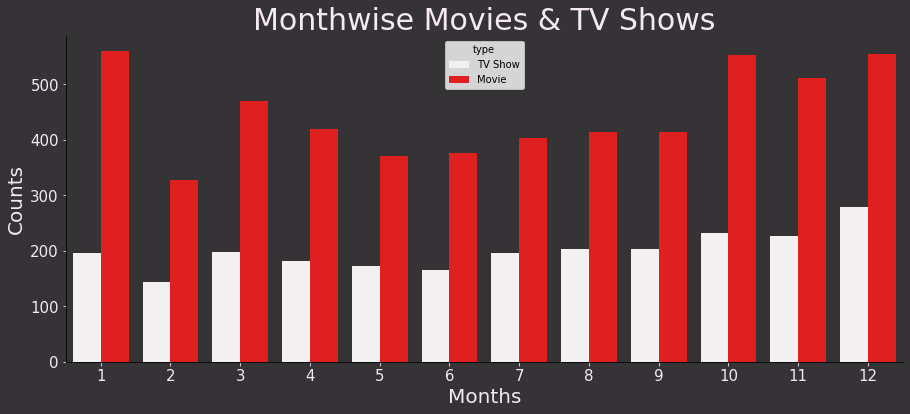

In [25]:
fig, ax = plt.subplots(figsize=(15,6), facecolor="#363336")
ax.patch.set_facecolor('#363336')
sns.countplot(x='month_added', hue='type', lw=5, color='red', data=df, ax=ax)
ax.tick_params(axis='x', colors='#F5E9F5', labelsize=15)
ax.tick_params(axis='y', colors='#F5E9F5', labelsize=15)
ax.set_xlabel("Months", color='#F5E9F5', fontsize=20)
ax.set_ylabel("Counts", color='#F5E9F5', fontsize=20)
ax.set_title("Monthwise Movies & TV Shows", color='#F5E9F5', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)



*   From Octomber to January, maximum number of movies and TV shows were added.

*   Possible reason for that is, during this period of time events such as Christmas, New Year and several holidays takes place.List item



**On Day Basis**

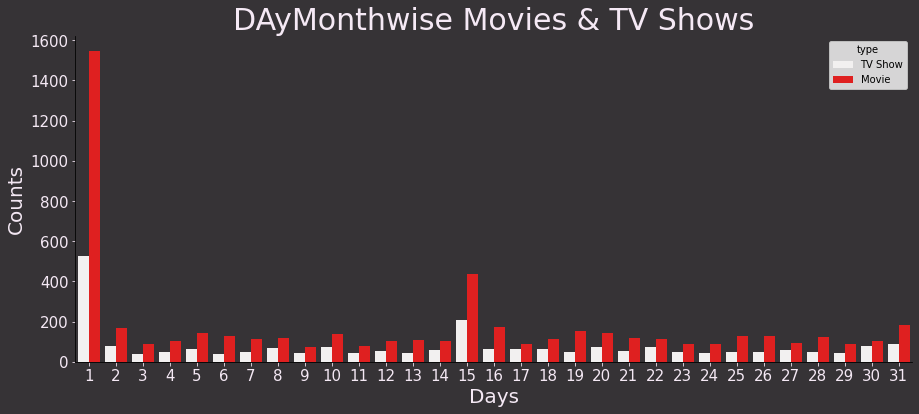

In [26]:
fig, ax = plt.subplots(figsize=(15,6), facecolor="#363336")
ax.patch.set_facecolor('#363336')
sns.countplot(x='day_added', hue='type', lw=5, color='red', data=df, ax=ax)
ax.tick_params(axis='x', colors='#F5E9F5', labelsize=15)
ax.tick_params(axis='y', colors='#F5E9F5', labelsize=15)
ax.set_xlabel("Days", color='#F5E9F5', fontsize=20)
ax.set_ylabel("Counts", color='#F5E9F5', fontsize=20)
ax.set_title("DAyMonthwise Movies & TV Shows", color='#F5E9F5', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)



*   Maximum number of movies and TV shows were either on start of the month or mid of the month.



**Wordwide Presence of Netflix**



*   Popularity Netflix is all over the world.
*   Lets look for its highest presence over countries.



Top 10 Countries having maximum Movies and Tv shows 

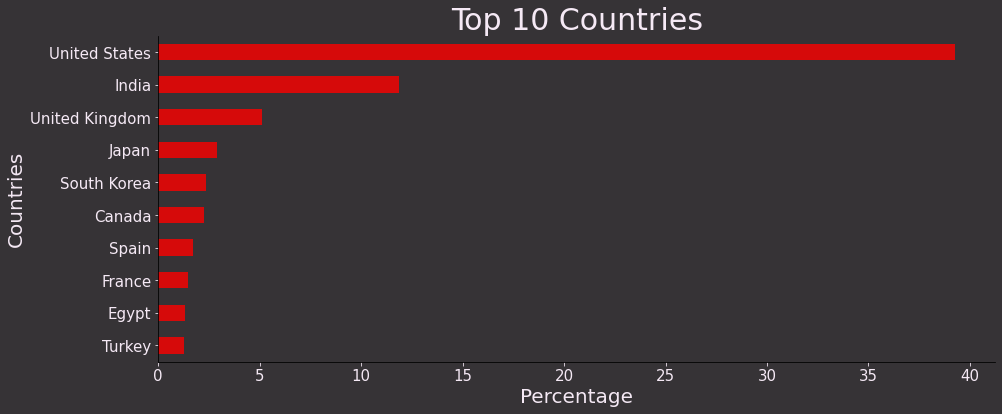

In [27]:
fig, ax = plt.subplots(figsize=(15,6), facecolor="#363336")
ax.patch.set_facecolor('#363336')
(df['country'].value_counts().sort_values()/df.shape[0]*100)[-10:].plot(kind='barh', ax=ax, color='red', alpha=0.8)
ax.tick_params(axis='x', colors='#F5E9F5', labelsize=15)
ax.tick_params(axis='y', colors='#F5E9F5', labelsize=15)
ax.set_xlabel("Percentage", color='#F5E9F5', fontsize=20)
ax.set_ylabel("Countries", color='#F5E9F5', fontsize=20)
ax.set_title("Top 10 Countries", color='#F5E9F5', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)



*   Unities State tops in list of maximum number of movies and TV shows.
*   Followed by India, UK and Japan.



**Ratings on Movies and TV Shows**

**For Movies:**

*   G: Kids
*   PG: Older Kids (7+)


*   PG-13: Teens (13+)
*   NC-17, NR, R, Unrated: Adults (18+)



**For TV Shows:**



*   TV-G, TV-Y: Kids

*   TV-Y7/FV/PG: Older Kids (7+)
*   TV-14: Young Adults (16+)


*   TV-MA: Adults (18+)



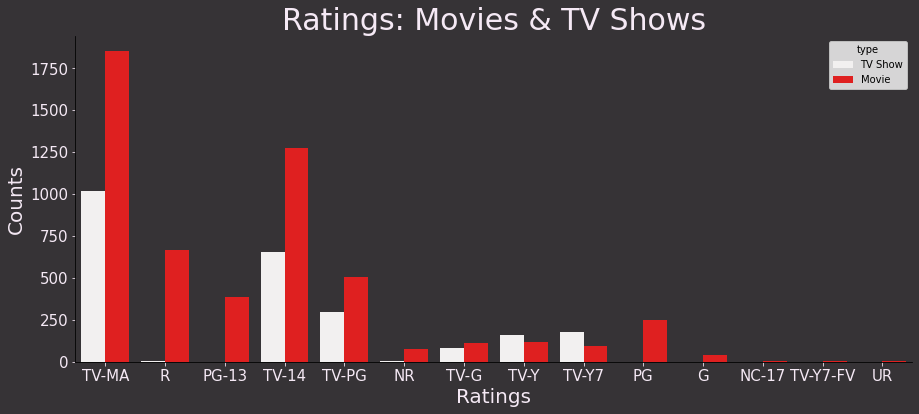

In [28]:
fig, ax = plt.subplots(figsize=(15,6), facecolor="#363336")
ax.patch.set_facecolor('#363336')
sns.countplot(x='rating', hue='type', lw=5, color='red', data=df, ax=ax)
ax.tick_params(axis='x', colors='#F5E9F5', labelsize=15)
ax.tick_params(axis='y', colors='#F5E9F5', labelsize=15)
ax.set_xlabel("Ratings", color='#F5E9F5', fontsize=20)
ax.set_ylabel("Counts", color='#F5E9F5', fontsize=20)
ax.set_title("Ratings: Movies & TV Shows", color='#F5E9F5', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)



*   Maximum of movies as well as TV shows are for matures only.



In [29]:
#just take look at values of cast
df['cast'][1]

'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato'

In [30]:
#list of cast by making split by comma
df['cast'] = df['cast'].apply(lambda x : x.split(', '))

In [31]:
#making list which contains all the entries from rows
cast_list = []
for i in df['cast']:
  cast_list += i

In [32]:
# unique cast
unique_cast = set(cast_list)

In [33]:
#create dictionary to save cast and their counts
cast_dict = dict((i, cast_list.count(i)) for i in unique_cast)

In [34]:
# create dataframe from above dictionary 
cast_df = pd.DataFrame.from_dict(cast_dict, orient='index',
                                 columns = ['Counts']).sort_values('Counts', ascending = True).reset_index().rename(columns = {'index' : 'cast'})

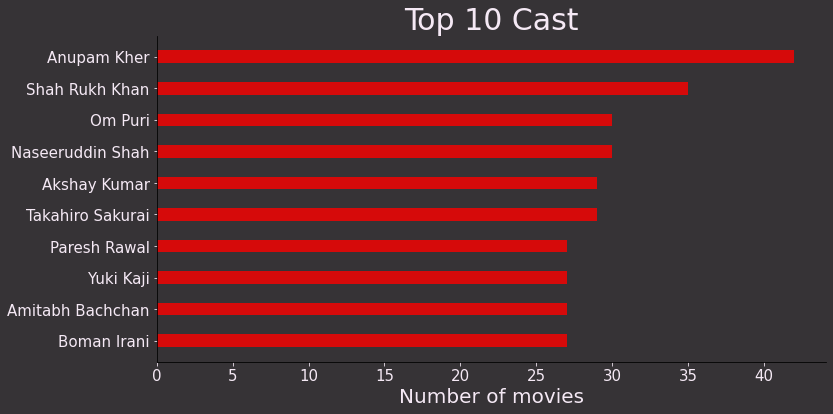

In [35]:
#plot of top 19 cast involved either movies or tv shows
fig, ax = plt.subplots(figsize=(12,6), facecolor="#363336")
ax.patch.set_facecolor('#363336')
ax.barh(y=cast_df['cast'][-11:-1], width = cast_df['Counts'][-11:-1], height= 0.4, color ='red', alpha=0.8)
ax.tick_params(axis='x', colors='#F5E9F5', labelsize=15)
ax.tick_params(axis='y', colors='#F5E9F5', labelsize=15)
ax.set_xlabel("Number of movies", color='#F5E9F5', fontsize=20)
ax.set_title("Top 10 Cast", color='#F5E9F5', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)



*   Anupam Kher have maximum number of movies or TV shows.


**Seperate Dataframes for Movies and TV shows**

In [36]:
#all the movies and TV shows in different dataframe
movies_df = df[df['type']=='Movie']
tv_df = df[df['type']=='TV Show']

Running Time of Movies

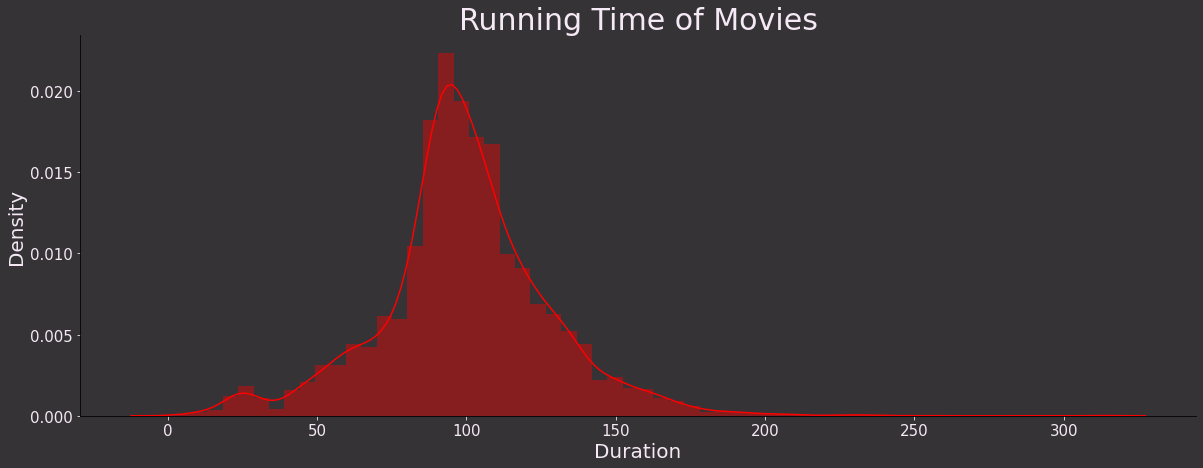

In [37]:
fig, ax = plt.subplots(figsize=(20,7), facecolor="#363336")
ax.patch.set_facecolor('#363336')
sns.distplot(movies_df['duration'], hist=True, bins=60, color='red', ax=ax)
ax.tick_params(axis='x', colors='#F5E9F5', labelsize=15)
ax.tick_params(axis='y', colors='#F5E9F5', labelsize=15)
ax.set_xlabel("Duration", color='#F5E9F5', fontsize=20)
ax.set_ylabel("Density", color='#F5E9F5', fontsize=20)
ax.set_title("Running Time of Movies", color='#F5E9F5', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)



*   Majority of movies have running time of between 50 to 150 min.



**Seasons of TV shows**

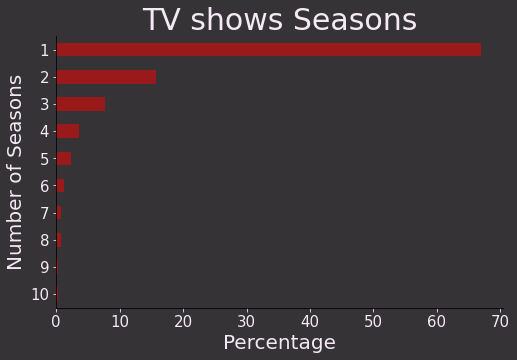

In [38]:
fig, ax = plt.subplots(figsize=(8,5), facecolor="#363336")
ax.patch.set_facecolor('#363336')
(tv_df['duration'].value_counts().sort_values()/tv_df.shape[0]*100)[-10:].plot(kind='barh', ax=ax, color='red', alpha=0.5)
ax.tick_params(axis='x', colors='#F5E9F5', labelsize=15)
ax.tick_params(axis='y', colors='#F5E9F5', labelsize=15)
ax.set_xlabel("Percentage", color='#F5E9F5', fontsize=20)
ax.set_ylabel("Number of Seasons", color='#F5E9F5', fontsize=20)
ax.set_title("TV shows Seasons", color='#F5E9F5', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)



*   Almost 68% of TV shows consist of single season only.



**Top Genres in Movies & TV Shows**

In [39]:
# list of genres by making split by comma
movies_df['listed_in'] = movies_df['listed_in'].apply(lambda x : x.split(', '))
tv_df['listed_in'] = tv_df['listed_in'].apply(lambda x : x.split(', '))

In [40]:
#Creating list having all the genres in dataset
movie_genre_list = []
for i in movies_df['listed_in']:
  movie_genre_list += i

In [41]:
tv_genre_list = []
for i in movies_df['listed_in']:
  tv_genre_list += i

In [42]:
# to make dictionary out of list of genres
from collections import Counter

In [43]:
# creating datagrame for genres in movies and tv shows
movie_genre_list = Counter(movie_genre_list)
tv_genre_list = Counter(tv_genre_list)

In [44]:
movie_genre_df = pd.DataFrame(movie_genre_list.items())
TV_genre_df = pd.DataFrame(tv_genre_list.items())

In [45]:
movie_genre_df.columns = ['genre', 'movie_count']
TV_genre_df.columns = ['genre', 'tv_count']

In [46]:
movie_genre_df = movie_genre_df.sort_values(by= 'movie_count').reset_index(drop=True)
TV_genre_df = TV_genre_df.sort_values(by= 'tv_count').reset_index(drop=True)

In [47]:
# first look of movie genres dataframe
movie_genre_df

,genre,movie_count
0,Movies,56
1,Anime Features,57
2,Faith & Spirituality,57
3,Cult Movies,59
4,LGBTQ Movies,90
5,Classic Movies,103
6,Sports Movies,196
7,Sci-Fi & Fantasy,218
8,Horror Movies,312
9,Music & Musicals,321


In [48]:
# first look of TV shows genres dataframe
TV_genre_df

,genre,tv_count
0,Movies,56
1,Anime Features,57
2,Faith & Spirituality,57
3,Cult Movies,59
4,LGBTQ Movies,90
5,Classic Movies,103
6,Sports Movies,196
7,Sci-Fi & Fantasy,218
8,Horror Movies,312
9,Music & Musicals,321




*   Some rows seems to be exactly same but due to initial space attached they are different.

*   Need to remove those spaces, so as to get total count of each genres.


*   After removing spaces, aggregation using pandas pivot table in order to get sum of counts of each genres.









In [49]:
# To remove spaces around the word
movie_genre_df['genre'] = movie_genre_df['genre'].str.strip()
TV_genre_df['genre'] = TV_genre_df['genre'].str.strip()

In [50]:
# Aggregating dataframe so as to get final counts of each genres
movie_genre_df = pd.pivot_table(movie_genre_df, index=['genre'], values=['movie_count'], aggfunc='sum').reset_index().sort_values('movie_count')
TV_genre_df = pd.pivot_table(TV_genre_df, index=['genre'], values=['tv_count'], aggfunc='sum').reset_index().sort_values('tv_count')

In [51]:
# Final movie genres datafrmae look like
movie_genre_df
     

,genre,movie_count
13,Movies,56
1,Anime Features,57
8,Faith & Spirituality,57
5,Cult Movies,59
12,LGBTQ Movies,90
3,Classic Movies,103
17,Sports Movies,196
16,Sci-Fi & Fantasy,218
9,Horror Movies,312
14,Music & Musicals,321


In [52]:

# Final TV shows genres datafrmae look like
TV_genre_df
     

,genre,tv_count
13,Movies,56
1,Anime Features,57
8,Faith & Spirituality,57
5,Cult Movies,59
12,LGBTQ Movies,90
3,Classic Movies,103
17,Sports Movies,196
16,Sci-Fi & Fantasy,218
9,Horror Movies,312
14,Music & Musicals,321




*   Now do not have repetative rows in genres.



**Top 5 Genres with Maximum Number of Movies**

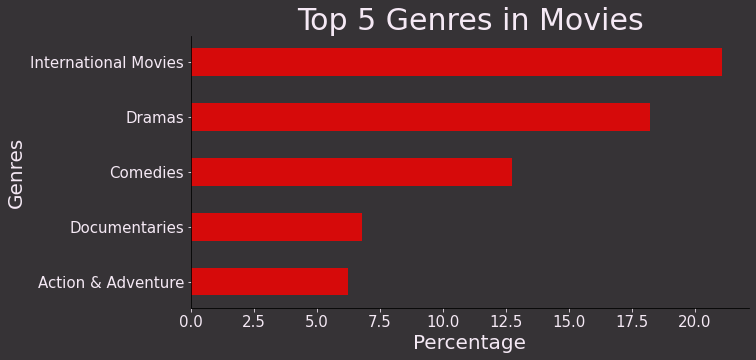

In [53]:
# bar plot showing top 5 genres in movies
fig, ax = plt.subplots(figsize=(10,5), facecolor="#363336")
ax.patch.set_facecolor('#363336')
ax.barh(y=movie_genre_df['genre'][-5:], width = movie_genre_df['movie_count'][-5:]/movie_genre_df['movie_count'].sum()*100, height=0.5, color = 'red',alpha=0.8)
ax.tick_params(axis='x', colors='#F5E9F5', labelsize=15)
ax.tick_params(axis='y', colors='#F5E9F5', labelsize=15)
ax.set_xlabel("Percentage", color='#F5E9F5', fontsize=20)
ax.set_ylabel("Genres", color='#F5E9F5', fontsize=20)
ax.set_title("Top 5 Genres in Movies", color='#F5E9F5', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)

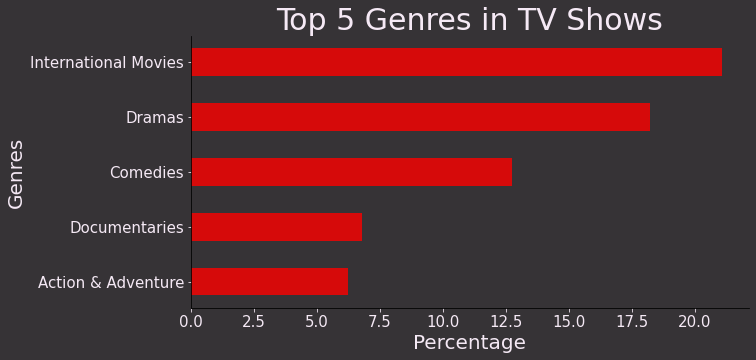

In [54]:
# bar plot showing top 5 genres in movies
fig, ax = plt.subplots(figsize=(10,5), facecolor="#363336")
ax.patch.set_facecolor('#363336')
ax.barh(y=TV_genre_df['genre'][-5:], width = TV_genre_df['tv_count'][-5:]/TV_genre_df['tv_count'].sum()*100, height=0.5, color = 'red',alpha=0.8)
ax.tick_params(axis='x', colors='#F5E9F5', labelsize=15)
ax.tick_params(axis='y', colors='#F5E9F5', labelsize=15)
ax.set_xlabel("Percentage", color='#F5E9F5', fontsize=20)
ax.set_ylabel("Genres", color='#F5E9F5', fontsize=20)
ax.set_title("Top 5 Genres in TV Shows", color='#F5E9F5', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)



*   Top 3 genres are exactly same for movies and TV shows.

*   Dramas genres hit all over the world.



**Originally Uploaded on Netflix**


*   Some movies and TV shows were actually released in the past and they were added later on Netflix.
*   But some movies and TV shows were released on Netflix itself. Named those as Netflix Originals.





*   **Originals** : For which released year and added year is same.



**Originals in Movies**


*   Creating new feature as originals having values Yes and No.




In [55]:
movies_df['originals'] = np.where(movies_df['release_year']==movies_df['year_added'], 'Yes', 'No')


([<matplotlib.patches.Wedge at 0x7f7de62e29a0>,
 [Text(-0.8902585632950727, -0.6460957285726268, 'Others'),
  Text(0.9711911599582614, 0.7048317038974106, 'Originals')],
 [Text(-0.4855955799791305, -0.3524158519487055, '69.98%'),
  Text(0.5665281766423191, 0.4111518272734894, '30.02%')])

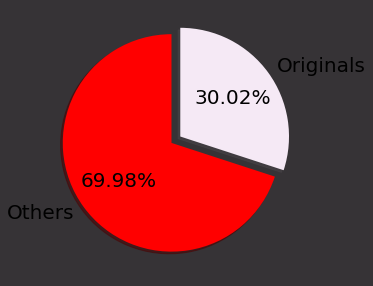

In [56]:
# pie plot showing percentage of originals and other in movies
fig, ax = plt.subplots(figsize=(5,5), facecolor='#363336')
ax.patch.set_facecolor('#363336')
explode = (0, 0.1)
ax.pie(movies_df['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90, textprops={'color': "black", 'fontsize': 20}, colors =['red', '#F5E9F5'])



*   30% movies released on Netflix.


*   70% movies added on Netflix were released earlier by different mode.



*   May be after buying rights of old released movies and then adding all the movies on Netflix.



# **Data Preprocessing**

In [57]:
df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
0,s1,TV Show,3%,"[João Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14
1,s2,Movie,7:19,"[Demián Bichir, Héctor Bonilla, Oscar Serrano,...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23
2,s3,Movie,23:59,"[Tedd Chan, Stella Chung, Henley Hii, Lawrence...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20
3,s4,Movie,9,"[Elijah Wood, John C. Reilly, Jennifer Connell...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16
4,s5,Movie,21,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, Aa...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020,1,1


In [58]:
# this is how values in cast feature looks like
df['cast'][0]

['João Miguel',
 'Bianca Comparato',
 'Michel Gomes',
 'Rodolfo Valente',
 'Vaneza Oliveira',
 'Rafael Lozano',
 'Viviane Porto',
 'Mel Fronckowiak',
 'Sergio Mamberti',
 'Zezé Motta',
 'Celso Frateschi']

In [59]:
# cast contains list of strings; so joining those strings in a string
df['cast'] = df['cast'].apply(lambda x : ','.join(map(str, x)))

In [60]:
# this is how values in cast feature looks now
df['cast'][0]

'João Miguel,Bianca Comparato,Michel Gomes,Rodolfo Valente,Vaneza Oliveira,Rafael Lozano,Viviane Porto,Mel Fronckowiak,Sergio Mamberti,Zezé Motta,Celso Frateschi'

In [61]:
# cast name contains space between initials, if it pass directly to clustering algoritm, it consider them as two different name
# initial can be same but different last name
# so we need to remove space between initial and last name
df['cast'] = df['cast'].apply(lambda x: x.replace(' ', '').split(','))

In [62]:
 # Above same operation applicable on country name, to remove complexity of two or more words in country name
 df['country'] = df['country'].apply(lambda x : x.replace(' ','').split(',')) 

In [63]:
#above same operation done in listed_in
df['listed_in'] = df['listed_in'].apply(lambda x: x.replace(' ', '').split(','))

In [64]:
# after abose all the changes, those features are in list format, so making list of description feature
df['description'] = df['description'].apply(lambda x : x.split(' '))

In [65]:
#creating new feature for clustering
df['text'] = df['cast']+df['country']+df['listed_in']+df['description']

In [66]:
#converting text feature to string from list
df['text'] = df['text'].apply(lambda x: " ".join(x))

In [67]:
#making all the words in text feature to lowercase
df['text'] = df['text'].apply(lambda x: x.lower())

# **Removing Punctuations**

In [68]:
def remove_punctuation(text):
  '''a function for removing punctuation'''
  import string
  # replacing the punctuations with no space,
  # which in effect deletes the punctuation marks
  translator = str.maketrans('', '', string.punctuation)
  # return the text stripped of punctuation marks
  return text.translate(translator)

In [69]:
# applying sbove function on text feature
df['text'] = df['text'].apply(remove_punctuation)

In [70]:
# This is how value in text looks like after removing punctuations
df['text'][0]

'joãomiguel biancacomparato michelgomes rodolfovalente vanezaoliveira rafaellozano vivianeporto melfronckowiak sergiomamberti zezémotta celsofrateschi brazil internationaltvshows tvdramas tvscififantasy in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor'

Removing StopWords

In [71]:
# using nltk library to download stopwords
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [72]:
# Defining stopwords 
def stopwords(text):
  '''a function for removing the stopword'''
  text = [word for word in text.split() if word not in sw]
  # joining the list of words with space separator
  return " ".join(text)

In [73]:
# applying above function on text feature
df['text'] = df['text'].apply(stopwords)

In [74]:
# this is how value in text looks like after removing stopwords
df['text'][0]

'joãomiguel biancacomparato michelgomes rodolfovalente vanezaoliveira rafaellozano vivianeporto melfronckowiak sergiomamberti zezémotta celsofrateschi brazil internationaltvshows tvdramas tvscififantasy future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

Stemming

In [75]:
from nltk.stem.snowball import SnowballStemmer

In [76]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):
  '''a function which stems each word in the given text'''
  text = [stemmer.stem(word) for word in text.split()]
  return " ".join(text)

In [77]:
# applying above stemming function on text feature
df['text']=df['text'].apply(stemming)

In [78]:
# this is how value in text looks like after applying stemming function
df ['text'][0]

'joãomiguel biancacomparato michelgom rodolfovalent vanezaoliveira rafaellozano vivianeporto melfronckowiak sergiomamberti zezémotta celsofrateschi brazil internationaltvshow tvdrama tvscififantasi futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalor'

In [79]:
# final dataframe will look like this after preprocessing
df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,text
0,s1,TV Show,3%,"[JoãoMiguel, BiancaComparato, MichelGomes, Rod...",[Brazil],2020-08-14,2020,TV-MA,4,"[InternationalTVShows, TVDramas, TVSci-Fi&Fant...","[In, a, future, where, the, elite, inhabit, an...",2020,8,14,joãomiguel biancacomparato michelgom rodolfova...
1,s2,Movie,7:19,"[DemiánBichir, HéctorBonilla, OscarSerrano, Az...",[Mexico],2016-12-23,2016,TV-MA,93,"[Dramas, InternationalMovies]","[After, a, devastating, earthquake, hits, Mexi...",2016,12,23,demiánbichir héctorbonilla oscarserrano azalia...
2,s3,Movie,23:59,"[TeddChan, StellaChung, HenleyHii, LawrenceKoh...",[Singapore],2018-12-20,2011,R,78,"[HorrorMovies, InternationalMovies]","[When, an, army, recruit, is, found, dead,, hi...",2018,12,20,teddchan stellachung henleyhii lawrencekoh tom...
3,s4,Movie,9,"[ElijahWood, JohnC.Reilly, JenniferConnelly, C...",[UnitedStates],2017-11-16,2009,PG-13,80,"[Action&Adventure, IndependentMovies, Sci-Fi&F...","[In, a, postapocalyptic, world,, rag-doll, rob...",2017,11,16,elijahwood johncreilli jenniferconnelli christ...
4,s5,Movie,21,"[JimSturgess, KevinSpacey, KateBosworth, Aaron...",[UnitedStates],2020-01-01,2008,PG-13,123,[Dramas],"[A, brilliant, group, of, students, become, ca...",2020,1,1,jimsturgess kevinspacey katebosworth aaronyoo ...


YES!!! Data Preprocessing is done now. Data is as per our requirement to carry out clustering.

# **K-Means Clustering**

Here we have textual data. Unfortunately clustering algoritms can not understand textual data. So, we use vectorization techniuque to convert textual data to numerical vectors.

In [133]:
# importing TfidVectorizer from sklearn library
from sklearn.feature_extraction.text import TfidfVectorizer

# sublinear_df is set to True to use a logarithmic form for frequency
# min_df is the minimum numbers of documents a word must be present in to be kept
# norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1
# ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams
# stop_words is set to "english" to remove all common pronouns ("a", "the", ...) to reduce the number of noisy features

vectorizer = TfidfVectorizer(sublinear_tf= True, min_df=10, norm='l2', ngram_range=(1, 2), stop_words='english')
X = vectorizer.fit_transform(df["text"])


# to look at the values of numerical vectors X
#pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names()).head()

In [132]:
# X is space matrix
X

<7777x2822 sparse matrix of type '<class 'numpy.float64'>'
	with 129153 stored elements in Compressed Sparse Row format>

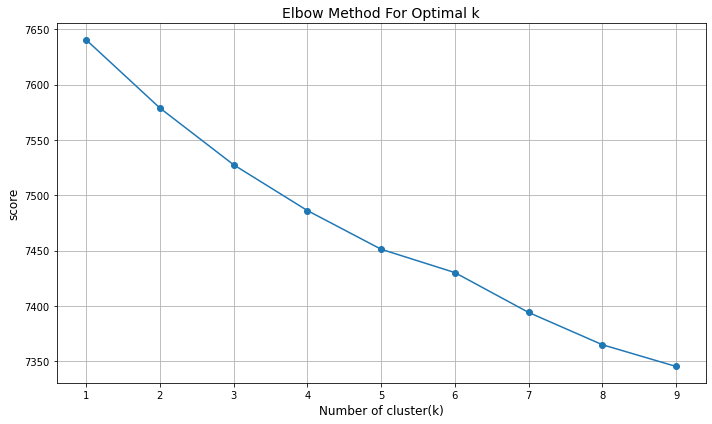

In [98]:
# Performing the elvow method to find the optimal number of clusters
from sklearn.cluster import KMeans

score = []
# for llop to append kmeans inertia values
for k in range(1,10):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X)
  score.append(kmeans.inertia_)

#Plot lineargraph
plt.figure(figsize=(10,6))
plt.plot(range(1,10), score,"-o")
plt.grid(True)
plt.xlabel("Number of cluster(k)", fontsize=12)
plt.ylabel("score", fontsize=12)
plt.title("Elbow Method For Optimal k", fontsize=14)
plt.xticks(range(1,10))
plt.tight_layout()

In [90]:
# Finding the optimal number of cluster using silhoutte method
# will be taking number of clusters from 2 to 10
from sklearn.metrics import silhouette_score
for n in range(2,10):
  clusterer = KMeans(n_clusters=n)
  preds = clusterer.fit_predict(X)
  centers = clusterer.cluster_centers_

  score = silhouette_score(X, preds)
  print("For n_clusters = {}, silhouette score is {}".format(n, score))

For n_clusters = 2, silhouette score is 0.007291722584263065
For n_clusters = 3, silhouette score is 0.009121958016377437
For n_clusters = 4, silhouette score is 0.010940239467590727
For n_clusters = 5, silhouette score is 0.011458347456727226
For n_clusters = 6, silhouette score is 0.012170019459029397
For n_clusters = 7, silhouette score is 0.013534458039515548
For n_clusters = 8, silhouette score is 0.014036805548193743
For n_clusters = 9, silhouette score is 0.01521213452523051




*   Maximum value of silhouette score is for k equals to 9.



In [91]:
# converting X to array
y = X.toarray()

In [92]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])




*   From Elbow curve and Silhoueete Score we can conclude that optimal number of clusters will be near about 25.

*   Lets plot the Silhouette plot to fix the number of cluster.





For n_clusters = 2 The average silhouette_score is : 0.007288999194426516
For n_clusters = 3 The average silhouette_score is : 0.009136650016593202
For n_clusters = 4 The average silhouette_score is : 0.011092851798745407
For n_clusters = 5 The average silhouette_score is : 0.011551616274550201
For n_clusters = 6 The average silhouette_score is : 0.011843713172147736
For n_clusters = 7 The average silhouette_score is : 0.013404418620819706
For n_clusters = 8 The average silhouette_score is : 0.015823922281356588
For n_clusters = 9 The average silhouette_score is : 0.01487418600903944


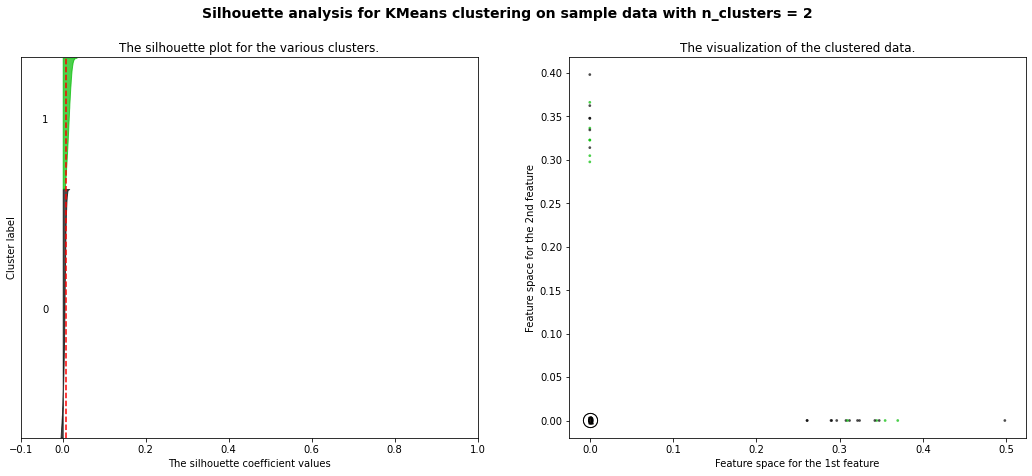

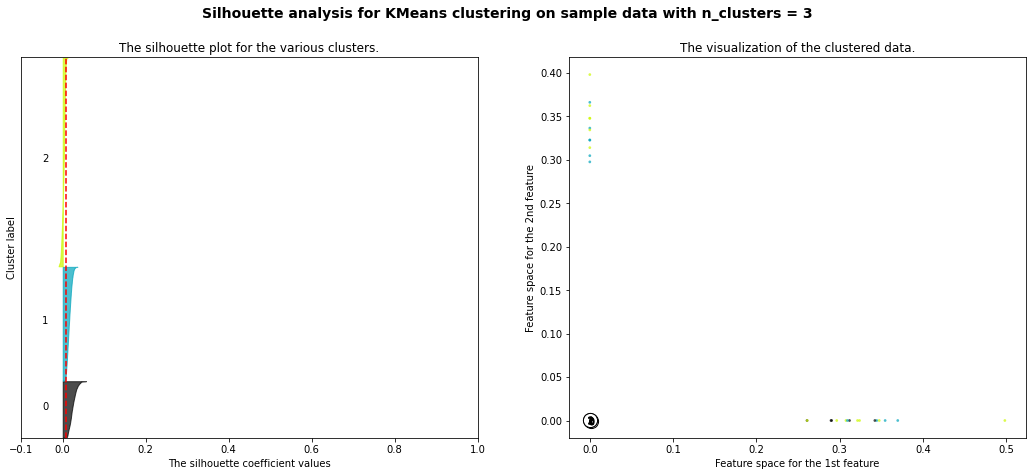

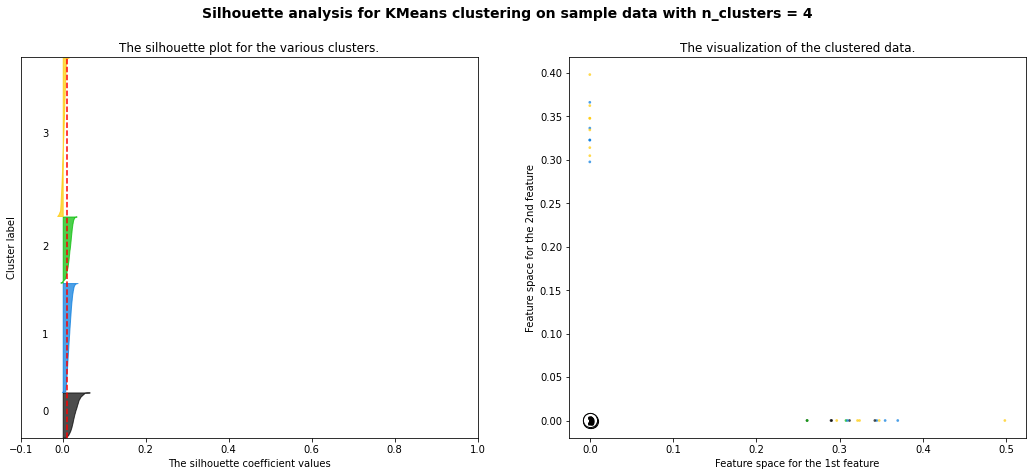

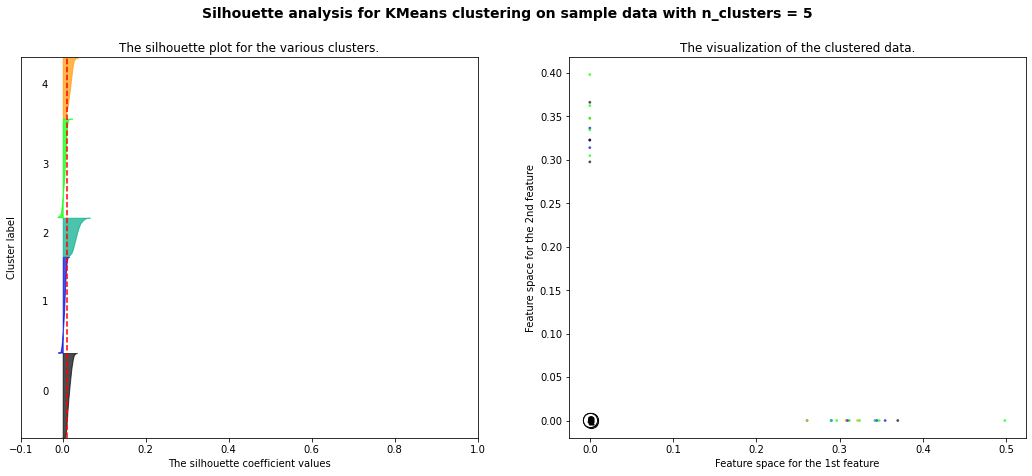

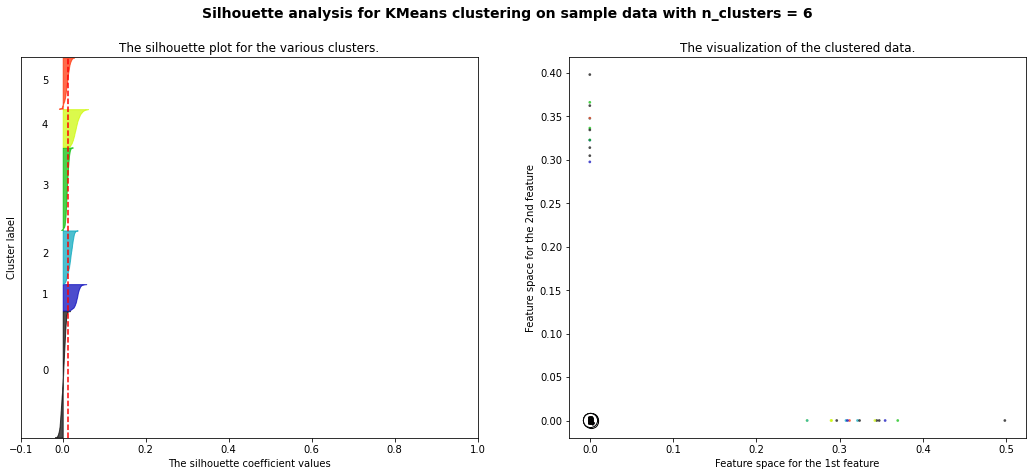

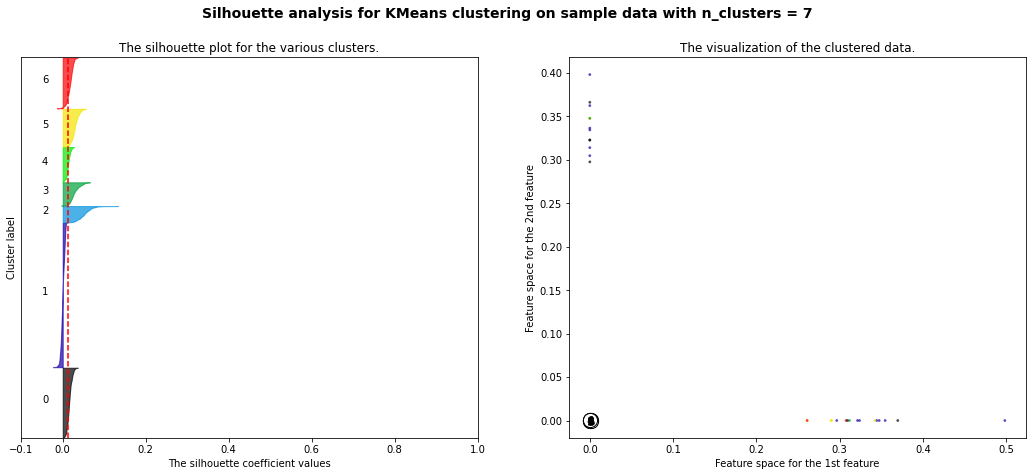

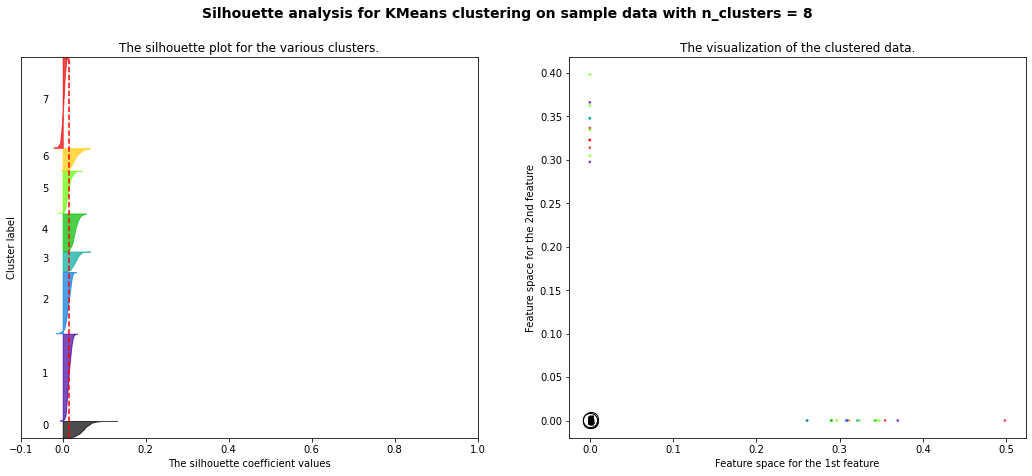

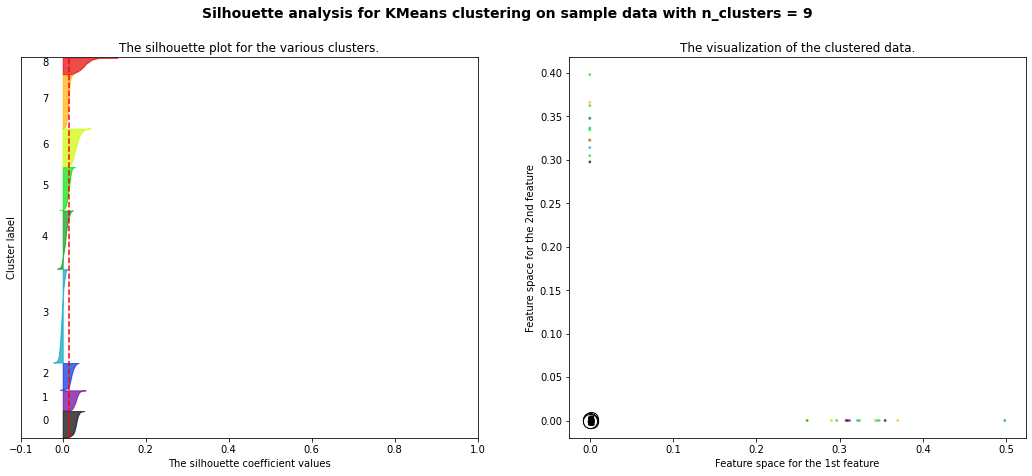

In [100]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm

range_n_clusters = [2,3,4,5,6,7,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(y) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(y)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(y, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(y, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(y[:, 0], y[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [102]:
# choosing optimal value of k for clustering
k = 9
     

In [103]:
# Clustering the dataset with the optimal number of clusters
model = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=600, tol=0.000001, random_state=0)
model.fit(X)

KMeans(max_iter=600, n_clusters=9, n_init=10, random_state=0, tol=1e-06)

In [104]:
#Predict the clusters and evaluate the silhouette score
clusters = model.predict(X)
score = silhouette_score(X, clusters)
print("Silhouette score is {}".format(score))

Silhouette score is 0.015797063937934036


In [105]:
# Adding a seperate column for the cluster
df["cluster"] = clusters

In [106]:
df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,text,cluster
0,s1,TV Show,3%,"[JoãoMiguel, BiancaComparato, MichelGomes, Rod...",[Brazil],2020-08-14,2020,TV-MA,4,"[InternationalTVShows, TVDramas, TVSci-Fi&Fant...","[In, a, future, where, the, elite, inhabit, an...",2020,8,14,joãomiguel biancacomparato michelgom rodolfova...,4
1,s2,Movie,7:19,"[DemiánBichir, HéctorBonilla, OscarSerrano, Az...",[Mexico],2016-12-23,2016,TV-MA,93,"[Dramas, InternationalMovies]","[After, a, devastating, earthquake, hits, Mexi...",2016,12,23,demiánbichir héctorbonilla oscarserrano azalia...,2
2,s3,Movie,23:59,"[TeddChan, StellaChung, HenleyHii, LawrenceKoh...",[Singapore],2018-12-20,2011,R,78,"[HorrorMovies, InternationalMovies]","[When, an, army, recruit, is, found, dead,, hi...",2018,12,20,teddchan stellachung henleyhii lawrencekoh tom...,7
3,s4,Movie,9,"[ElijahWood, JohnC.Reilly, JenniferConnelly, C...",[UnitedStates],2017-11-16,2009,PG-13,80,"[Action&Adventure, IndependentMovies, Sci-Fi&F...","[In, a, postapocalyptic, world,, rag-doll, rob...",2017,11,16,elijahwood johncreilli jenniferconnelli christ...,0
4,s5,Movie,21,"[JimSturgess, KevinSpacey, KateBosworth, Aaron...",[UnitedStates],2020-01-01,2008,PG-13,123,[Dramas],"[A, brilliant, group, of, students, become, ca...",2020,1,1,jimsturgess kevinspacey katebosworth aaronyoo ...,5


In [107]:
df['cluster'].value_counts()

7    1549
4    1146
2    1014
1     958
8     782
5     760
0     713
6     519
3     336
Name: cluster, dtype: int64

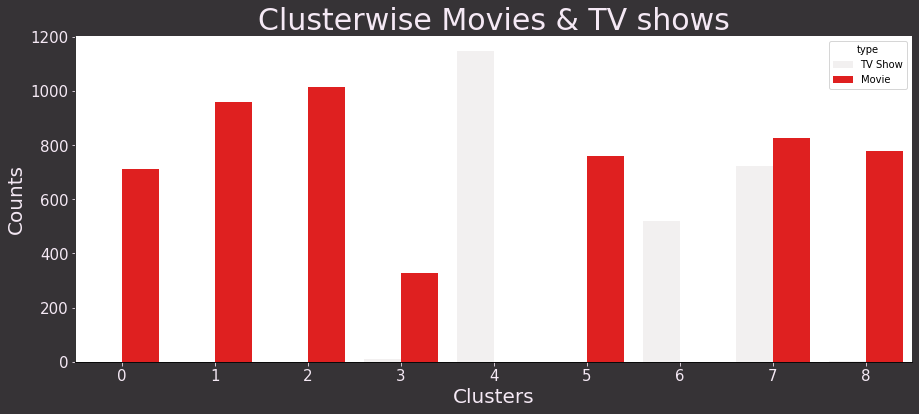

In [108]:
ax.patch.set_facecolor('#363336')
fig, ax = plt.subplots(figsize=(15, 6), facecolor="#363336")
sns.countplot(x='cluster', hue='type', lw=5, color='red', data=df, ax=ax)
ax.tick_params(axis='x', colors='#F5E9F5', labelsize=15)
ax.tick_params(axis='y', colors='#F5E9F5', labelsize=15)
ax.set_xlabel("Clusters", color='#F5E9F5', fontsize=20)
ax.set_ylabel("Counts", color='#F5E9F5', fontsize=20)
ax.set_title("Clusterwise Movies & TV shows", color='#F5E9F5', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)



*   Most of clusters shows movies or TV shows.
*   Some of the clusters show both in them.



In [109]:
df[df['cluster']==1]

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,text,cluster
33,s34,Movie,#realityhigh,"[NestaCooper, KateWalsh, JohnMichaelHiggins, K...",[UnitedStates],2017-09-08,2017,TV-14,99,[Comedies],"[When, nerdy, high, schooler, Dani, finally, a...",2017,9,8,nestacoop katewalsh johnmichaelhiggin keithpow...,1
34,s35,Movie,#Roxy,"[JakeShort, SarahFisher, BoobooStewart, DannyT...",[Canada],2019-04-10,2018,TV-14,105,"[Comedies, RomanticMovies]","[A, teenage, hacker, with, a, huge, nose, help...",2019,4,10,jakeshort sarahfish booboostewart dannytrejo p...,1
39,s40,Movie,"¡Ay, mi madre!","[EstefaníadelosSantos, SecundelaRosa, TerelePá...",[Spain],2019-07-19,2019,TV-MA,81,"[Comedies, InternationalMovies]","[When, her, estranged, mother, suddenly, dies,...",2019,7,19,estefaníadelossanto secundelarosa terelepávez ...,1
40,s41,Movie,Çarsi Pazar,"[ErdemYener, AyhanTaş, EminOlcay, MuharremGülm...",[Turkey],2017-03-10,2015,TV-14,97,"[Comedies, InternationalMovies]","[The, slacker, owner, of, a, public, bath, hou...",2017,3,10,erdemyen ayhantaş eminolcay muharremgülmez eli...,1
42,s43,Movie,Çok Filim Hareketler Bunlar,"[AyçaErturan, AydanTaş, AyşegülAkdemir, BurcuG...",[Turkey],2017-03-10,2010,TV-MA,99,"[Comedies, InternationalMovies]","[Vignettes, of, the, summer, holidays, follow,...",2017,3,10,ayçaerturan aydantaş ayşegülakdemir burcugönd ...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7760,s7761,Movie,Zaki Chan,"[AhmedHelmy, YasminAbdulaziz, HassanHosny, Has...",[Egypt],2020-05-19,2005,TV-PG,109,"[Comedies, InternationalMovies, RomanticMovies]","[An, unqualified, young, man, has, his, work, ...",2020,5,19,ahmedhelmi yasminabdulaziz hassanhosni hasanka...,1
7761,s7762,Movie,Zapped,"[Zendaya, ChanellePeloso, SpencerBoldman, Emil...","[Canada, UnitedStates]",2017-02-01,2014,TV-Y,92,"[Children&FamilyMovies, Comedies]","[A, girl, discovers, a, dog-training, app, tha...",2017,2,1,zendaya chanellepeloso spencerboldman emiliamc...,1
7772,s7773,Movie,Zipi & Zape y la Isla del Capitan,"[TeoPlanell, ToniGómez, ElenaAnaya, IriaCastel...",[Spain],2017-07-01,2016,TV-PG,105,"[Children&FamilyMovies, Comedies]","[At, Christmas,, Zip, and, Zap, take, a, trip,...",2017,7,1,teoplanel tonigómez elenaanaya iriacastellano ...,1
7778,s7779,Movie,Zombieland,"[JesseEisenberg, WoodyHarrelson, EmmaStone, Ab...",[UnitedStates],2019-11-01,2009,R,88,"[Comedies, HorrorMovies]","[Looking, to, survive, in, a, world, taken, ov...",2019,11,1,jesseeisenberg woodyharrelson emmaston abigail...,1


# **Recommender System**

In [110]:
# take a look to decide which features to use for recommender system
df.tail(2)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,text,cluster
7785,s7786,TV Show,Zumbo's Just Desserts,"[AdrianoZumbo, RachelKhoo]",[Australia],2020-10-31,2019,TV-PG,1,"[InternationalTVShows, RealityTV]","[Dessert, wizard, Adriano, Zumbo, looks, for, ...",2020,10,31,adrianozumbo rachelkhoo australia internationa...,6
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,[missing],"[UnitedKingdom, Canada, UnitedStates]",2020-03-01,2019,TV-MA,90,"[Documentaries, Music&Musicals]","[This, documentary, delves, into, the, mystiqu...",2020,3,1,miss unitedkingdom canada unitedst documentari...,8


In [111]:
# title and text features used for recommender system
final_df = df[['title', 'text']].reset_index()

In [112]:
# resetting new index and dropping old index
final_df.drop('index', axis=1, inplace=True)

In [113]:
#look at final dataframe
final_df.head()

,title,text
0,3%,joãomiguel biancacomparato michelgom rodolfova...
1,7:19,demiánbichir héctorbonilla oscarserrano azalia...
2,23:59,teddchan stellachung henleyhii lawrencekoh tom...
3,9,elijahwood johncreilli jenniferconnelli christ...
4,21,jimsturgess kevinspacey katebosworth aaronyoo ...


In [114]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=4000, stop_words='english')

In [115]:
vector = cv.fit_transform(final_df['text']).toarray()
vector.shape

(7777, 4000)

In [116]:
# Cosine similarity is a metric that measures the cosine of the angle between two vectors projected in a multi-dimensionalspace.
from sklearn.metrics.pairwise import cosine_similarity


In [117]:
similarity = cosine_similarity(vector)
similarity

array([[1.        , 0.        , 0.06085806, ..., 0.        , 0.07784989,
        0.        ],
       [0.        , 1.        , 0.05270463, ..., 0.15389675, 0.        ,
        0.        ],
       [0.06085806, 0.05270463, 1.        , ..., 0.05407381, 0.        ,
        0.        ],
       ...,
       [0.        , 0.15389675, 0.05407381, ..., 1.        , 0.        ,
        0.37851665],
       [0.07784989, 0.        , 0.        , ..., 0.        , 1.        ,
        0.07106691],
       [0.        , 0.        , 0.        , ..., 0.37851665, 0.07106691,
        1.        ]])

In [118]:
# how to fetch index of movie by its name
final_df[final_df['title'] == "Zumbo's Just Desserts"].index[0]

7775

In [119]:
# function to get 10 movies which are at very near distance from given movie
def recommend(movie):
  #first fetch the index of given movie
  index = final_df[final_df['title'] == movie].index[0]
  # then list down the closest movie index
  distances = sorted(list(enumerate(similarity[index])), reverse = True, key = lambda x: x[1])
  #selecting top 10 movies except first one; first one will be same movie as given on
  for i in distances[1:11]:
    print(final_df.iloc[i[0]].title)


In [120]:
#example 1
recommend("Zumbo's Just Desserts")

Ink Master
Fit for Fashion
The Apartment
Instant Hotel
My Hotter Half
Nailed It! Mexico
The Chefs' Line
Nailed It! France
Skin Wars
The Circle Brazil


In [121]:
#example 2
recommend("50 First Dates")

Big Daddy
Mr. Deeds
The Knight Before Christmas
Four Christmases
Hubie Halloween
Employee of the Month
Heartbreakers
When We First Met
Falling Inn Love
Operation Christmas Drop


In example 2: All the movies are of romantic genres.

# **Conclusions**

*   Movies uploaded on Netflix are more than twice the TV Shows uploaded.
*   TV shows and movies are incresing continuosly but in 2019 there is drop in number of movies.


*   From Octomber to January, maximum number of movies and TV shows were added.

*   Maximum number of movies and TV shows were either on start of the month or mid of the month.

*   United State tops in the list of maximum number of movies and TV shows followed by India, UK and Japan.



*   Maximum of the movies as well as TV shows are for matures only.
*   Anupam Kher top from the list of casts having maximum number of movies and TV shows.


*   Majority of movies have running time of between 50 to 150 min.


*   Almost 68% of TV shows consist of single season only.


*   Top 3 genres are exactly same for movies and TV shows.




*   Dramas genres hit all over the world.
*   30% movies and 50% TV shows are Netflix Originals.



*   Clustering done by K-Means Clustering, found optimal number of clusters equal to 9 with highest Silhoeutte Score.
*   Recommender system using cosine similarirty performs well on data.




















